In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [41]:
test_df = pd.read_csv('data/5년후 나에게.txt', sep='\t')
test_df.head(3)

,Unnamed: 0,댓글,평점
0,0,교활한 상술과 이에 편승한 교보에 실망했다.이책은 책이 아니고 그냥 노트일 뿐이다....,0
1,1,"좋은 분께 선물드린 책입니다,,",1
2,2,매년 같은날 다른 기분과 느낌 매일매일이 새로운 기분일것같아요꼭 사시길 추천행요,1


In [42]:
# 평점 칼럼 문자 -> 숫자로 변경
test_df['평점'] = pd.to_numeric(test_df['평점'])
test_df

,Unnamed: 0,댓글,평점
0,0,교활한 상술과 이에 편승한 교보에 실망했다.이책은 책이 아니고 그냥 노트일 뿐이다....,0
1,1,"좋은 분께 선물드린 책입니다,,",1
2,2,매년 같은날 다른 기분과 느낌 매일매일이 새로운 기분일것같아요꼭 사시길 추천행요,1
3,3,배송 받자마자 오늘 처음 시작했어요. 5년간 내 삶의 기록들이 기대됩니다.,1
4,4,얼마전에 서점에서 발견하고 계속 사고 싶었던 책이라 너무너무 기대되요!!,1
...,...,...,...
550,550,5년후 읽어봐야지,1
551,551,5년후에 나에게 천천히 보내는 작은 선물,1
552,552,5년 후에 읽으면 나에겐 값진 선물이 되겠지,1
553,553,5년후 다시 읽어볼겁니다! ^^,1


In [43]:
test_df['평점'].value_counts()

1    528
0     27
Name: 평점, dtype: int64

In [ ]:
# 1: 긍정 / 2: 부정
# 부정갯수 / 전체 행 갯수 -1 = 부정비율

In [44]:
# 리뷰 전체
review_all = len(test_df['평점']) - 1
# 긍정갯수
review_pos = test_df.sum(axis=0) # 열의 합: 528(긍정)
# 부정갯수
review_nag = review_all - review_pos

print(review_all,review_pos,review_nag)

554 Unnamed: 0    153735
평점               528
dtype: int64 Unnamed: 0   -153181
평점                26
dtype: int64


In [82]:
# 긍정
pos_ratio = review_pos / review_all *100
nag_ratio = review_nag / review_all *100
ratio = [pos_ratio,nag_ratio]
print(ratio)

[Unnamed: 0    27750.000000
평점               95.306859
dtype: float64, Unnamed: 0   -27650.000000
평점                4.693141
dtype: float64]


In [3]:
ex = pd.read_csv('data/example.csv', sep=',')

In [4]:
ex.head()

,Unnamed: 0,댓글,평점,bookname,Unnamed: 4,구분
0,0,교활한 상술과 이에 편승한 교보에 실망했다.이책은 책이 아니고 그냥 노트일 뿐이다....,-1,5년후 나에게,NaN,1
1,1,"좋은 분께 선물드린 책입니다,,",1,5년후 나에게,NaN,1
2,2,매년 같은날 다른 기분과 느낌 매일매일이 새로운 기분일것같아요꼭 사시길 추천행요,1,5년후 나에게,NaN,1
3,3,배송 받자마자 오늘 처음 시작했어요. 5년간 내 삶의 기록들이 기대됩니다.,1,5년후 나에게,NaN,1
4,4,얼마전에 서점에서 발견하고 계속 사고 싶었던 책이라 너무너무 기대되요!!,1,5년후 나에게,NaN,1


In [5]:
# 도서별 긍정 갯수
pos_point_to_book = ex.groupby('bookname')['평점'].value_counts()
pos_point_to_book

bookname                 평점
50부터는 인생관을 바꿔야 산다         1     42
                         -1      8
5년후 나에게                   1    528
                         -1     27
감사하면 달라지는 것들              1     40
                         -1      1
나는 무조건 합격하는 공부만 한다        1     81
                         -1      7
린치핀                       1      8
말센스                       1    211
                         -1      9
미러                        1      6
베스트 셀프                    1    115
                         -1      6
세계의 리더들은 왜 철학을 공부하는가      1     15
                         -1      2
시작의 기술                    1     68
                         -1      2
아주 작은 습관의 힘               1    531
                         -1      7
에이트                       1    237
                         -1     19
인생을 어떻게 살면 좋겠냐고 묻는 딸에게    1     53
                         -1      3
타이탄의 도구들                  1    269
                         -1      5
탁월한 인생을 만드는 법             1     26
                         -1

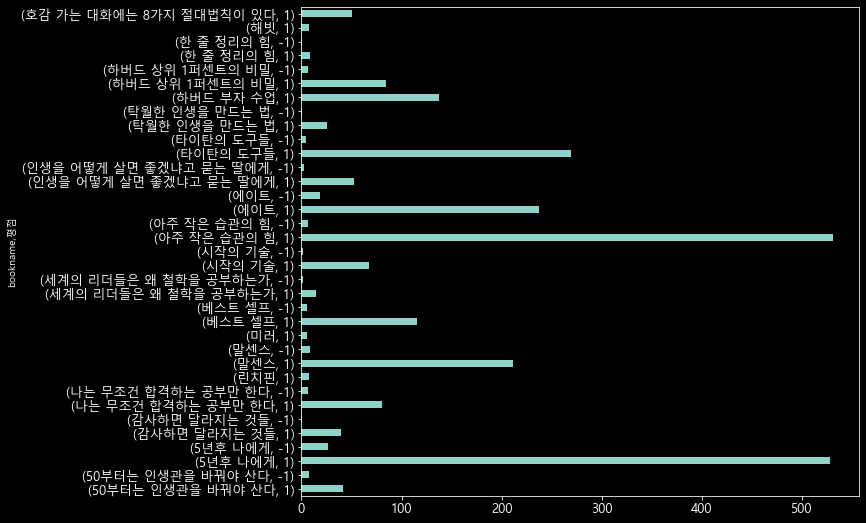

In [7]:
plt.style.use(['dark_background'])
pos_point_to_book.plot(kind='barh', figsize=(10,9), fontsize=13)

In [18]:
# 도서별 긍/부정 비율구하기 - 긍정:1 / 부정:-1
point_to_book_s = ex.groupby(['bookname','평점'])['평점'].sum()
abs(point_to_book_s)


bookname                 평점
50부터는 인생관을 바꿔야 산다        -1      8
                          1     42
5년후 나에게                  -1     27
                          1    528
감사하면 달라지는 것들             -1      1
                          1     40
나는 무조건 합격하는 공부만 한다       -1      7
                          1     81
린치핀                       1      8
말센스                      -1      9
                          1    211
미러                        1      6
베스트 셀프                   -1      6
                          1    115
세계의 리더들은 왜 철학을 공부하는가     -1      2
                          1     15
시작의 기술                   -1      2
                          1     68
아주 작은 습관의 힘              -1      7
                          1    531
에이트                      -1     19
                          1    237
인생을 어떻게 살면 좋겠냐고 묻는 딸에게   -1      3
                          1     53
타이탄의 도구들                 -1      5
                          1    269
탁월한 인생을 만드는 법            -1      1
                          1

In [19]:
# 도서별 전체 갯수
point_to_book_all = ex.groupby('bookname')['구분'].sum()
point_to_book_all

bookname
50부터는 인생관을 바꿔야 산다           50
5년후 나에게                    555
감사하면 달라지는 것들                41
나는 무조건 합격하는 공부만 한다          88
린치핀                          8
말센스                        220
미러                           6
베스트 셀프                     121
세계의 리더들은 왜 철학을 공부하는가        17
시작의 기술                      70
아주 작은 습관의 힘                538
에이트                        256
인생을 어떻게 살면 좋겠냐고 묻는 딸에게      56
타이탄의 도구들                   274
탁월한 인생을 만드는 법               27
하버드 부자 수업                  137
하버드 상위 1퍼센트의 비밀             91
한 줄 정리의 힘                   10
해빗                           8
호감 가는 대화에는 8가지 절대법칙이 있다     51
Name: 구분, dtype: int64

In [34]:
point_to_book_ratio = abs(point_to_book_s) /point_to_book_all
point_to_book_ratio

bookname                 평점
50부터는 인생관을 바꿔야 산다        -1    0.160000
                          1    0.840000
5년후 나에게                  -1    0.048649
                          1    0.951351
감사하면 달라지는 것들             -1    0.024390
                          1    0.975610
나는 무조건 합격하는 공부만 한다       -1    0.079545
                          1    0.920455
린치핀                       1    1.000000
말센스                      -1    0.040909
                          1    0.959091
미러                        1    1.000000
베스트 셀프                   -1    0.049587
                          1    0.950413
세계의 리더들은 왜 철학을 공부하는가     -1    0.117647
                          1    0.882353
시작의 기술                   -1    0.028571
                          1    0.971429
아주 작은 습관의 힘              -1    0.013011
                          1    0.986989
에이트                      -1    0.074219
                          1    0.925781
인생을 어떻게 살면 좋겠냐고 묻는 딸에게   -1    0.053571
                          1    0.946429
타이탄의 도구들    

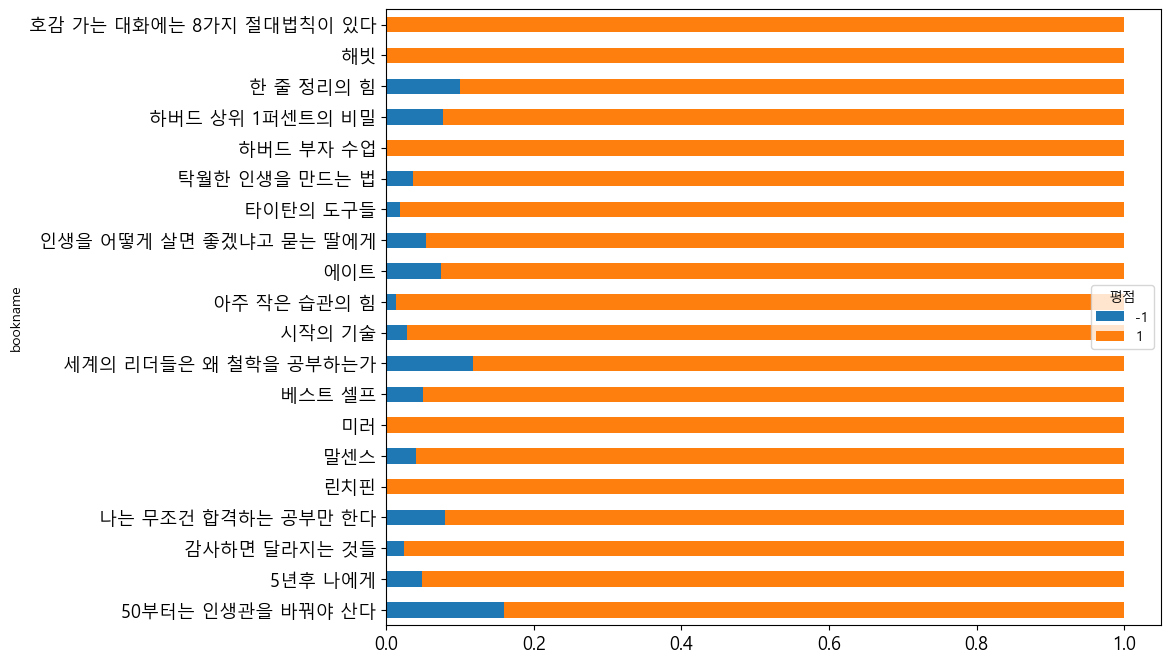

In [37]:
point_to_book_ratio.unstack().plot(kind='barh', figsize=(10,8), stacked=True, fontsize=13)

#### 긍정부정 포인트 좌표 찍기

In [ ]:
# 도서별 1값, -1값 따로 배열로, np.array

In [4]:
ex.head()

,Unnamed: 0,댓글,평점,bookname,Unnamed: 4,구분
0,0,교활한 상술과 이에 편승한 교보에 실망했다.이책은 책이 아니고 그냥 노트일 뿐이다....,-1,5년후 나에게,NaN,1
1,1,"좋은 분께 선물드린 책입니다,,",1,5년후 나에게,NaN,1
2,2,매년 같은날 다른 기분과 느낌 매일매일이 새로운 기분일것같아요꼭 사시길 추천행요,1,5년후 나에게,NaN,1
3,3,배송 받자마자 오늘 처음 시작했어요. 5년간 내 삶의 기록들이 기대됩니다.,1,5년후 나에게,NaN,1
4,4,얼마전에 서점에서 발견하고 계속 사고 싶었던 책이라 너무너무 기대되요!!,1,5년후 나에게,NaN,1


In [40]:
body = pd.DataFrame(point_to_book_ratio)

In [41]:
body

0
bookname                평점          
50부터는 인생관을 바꿔야 산다       -1  0.160000
                         1  0.840000
5년후 나에게                 -1  0.048649
                         1  0.951351
감사하면 달라지는 것들            -1  0.024390
                         1  0.975610
나는 무조건 합격하는 공부만 한다      -1  0.079545
                         1  0.920455
린치핀                      1  1.000000
말센스                     -1  0.040909
                         1  0.959091
미러                       1  1.000000
베스트 셀프                  -1  0.049587
                         1  0.950413
세계의 리더들은 왜 철학을 공부하는가    -1  0.117647
                         1  0.882353
시작의 기술                  -1  0.028571
                         1  0.971429
아주 작은 습관의 힘             -1  0.013011
                         1  0.986989
에이트                     -1  0.074219
                         1  0.925781
인생을 어떻게 살면 좋겠냐고 묻는 딸에게  -1  0.053571
                         1  0.946429
타이탄의 도구들                -1  0.018248
                         1  0.981752
탁월한 인생을 만드는 법           -1  0.037037
                         1  0.962963
하버드 부자 수업                1  1.000000
하버드 상위 1퍼센트의 비밀         -1  0.076923
                         1  0.923077
한 줄 정리의 힘               -1  0.100000
                         1  0.900000
해빗                       1  1.000000
호감 가는 대화에는 8가지 절대법칙이 있다  1  1.000000

In [11]:
import openpyxl

In [42]:
# 엑셀로 저장 -> -1/1 기준으로 재배열, Null값 처리
writer = pd.ExcelWriter('review_point.xlsx', engine='xlsxwriter')
 
## DataFrame을 xlsx에 쓰기
with pd.ExcelWriter(writer) as writer:
    body.to_excel(writer, sheet_name='Sheet1')
 # Pandas writer 객체 닫기
writer.close()

In [43]:
review_point = pd.read_csv('review_point.csv', sep=',')

In [44]:
review_point.head()

,평점,50부터는 인생관을 바꿔야 산다,5년후 나에게,감사하면 달라지는 것들,나는 무조건 합격하는 공부만 한다,린치핀,말센스,미러,베스트 셀프,세계의 리더들은 왜 철학을 공부하는가,...,아주 작은 습관의 힘,에이트,인생을 어떻게 살면 좋겠냐고 묻는 딸에게,타이탄의 도구들,탁월한 인생을 만드는 법,하버드 부자 수업,하버드 상위 1퍼센트의 비밀,한 줄 정리의 힘,해빗,호감 가는 대화에는 8가지 절대법칙이 있다
0,Nagative,0.16,0.048649,0.02439,0.079545,0,0.040909,0,0.049587,0.117647,...,0.013011,0.074219,0.053571,0.018248,0.037037,0,0.076923,0.1,0,0
1,Positive,0.84,0.951351,0.97561,0.920455,1,0.959091,1,0.950413,0.882353,...,0.986989,0.925781,0.946429,0.981752,0.962963,1,0.923077,0.9,1,1


In [45]:
del review_point['평점']

In [46]:
Y = review_point.loc[0]
X = review_point.loc[1]
print(X)
print(Y)
# 부정의견 10프로 넘음 : 14.50부터는 인생관을 바꿔야 산다 / 4.세계의 리더들은 왜 철학을 공부하는가 / 20.한 줄 정리의 힘 
# 7.나는 무조건 합격하는 공부만 한다

50부터는 인생관을 바꿔야 산다          0.840000
5년후 나에게                    0.951351
감사하면 달라지는 것들               0.975610
나는 무조건 합격하는 공부만 한다         0.920455
린치핀                        1.000000
말센스                        0.959091
미러                         1.000000
베스트 셀프                     0.950413
세계의 리더들은 왜 철학을 공부하는가       0.882353
시작의 기술                     0.971429
아주 작은 습관의 힘                0.986989
에이트                        0.925781
인생을 어떻게 살면 좋겠냐고 묻는 딸에게     0.946429
타이탄의 도구들                   0.981752
탁월한 인생을 만드는 법              0.962963
하버드 부자 수업                  1.000000
하버드 상위 1퍼센트의 비밀            0.923077
한 줄 정리의 힘                  0.900000
해빗                         1.000000
호감 가는 대화에는 8가지 절대법칙이 있다    1.000000
Name: 1, dtype: float64
50부터는 인생관을 바꿔야 산다          0.160000
5년후 나에게                    0.048649
감사하면 달라지는 것들               0.024390
나는 무조건 합격하는 공부만 한다         0.079545
린치핀                        0.000000
말센스                        0.040909
미러                         0.000000
베스트 

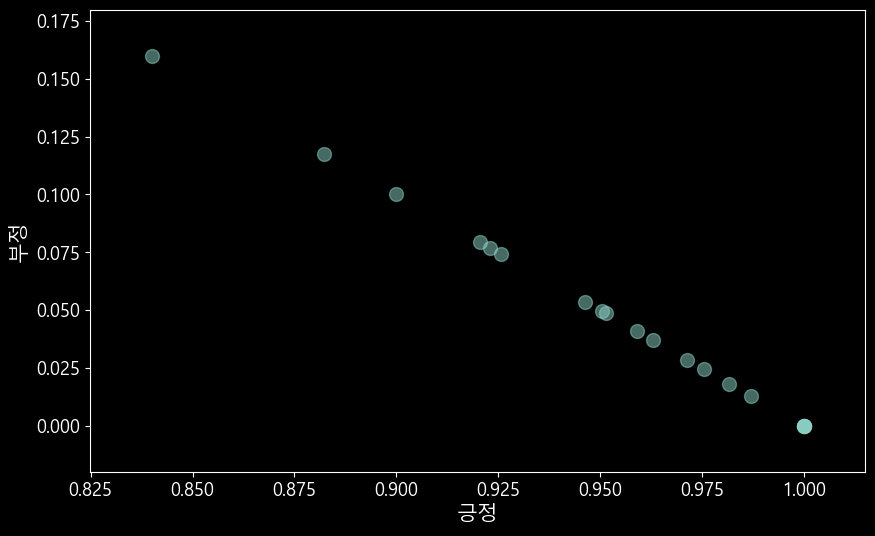

In [47]:
S = 100
sample_size = 1000
plt.style.use(['dark_background'])
plt.figure(figsize=(10,6))
plt.rc('font', size=13)
plt.scatter(X, Y, s=S, alpha= 0.5)
plt.xlabel('긍정', fontsize=15)
plt.ylabel('부정', fontsize=15)
plt.show()